In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Diabetes Dataset..

## Data Importing, Normalization and Data Discretization

In [2]:
# Reading data in csv

diabetes_df = pd.read_csv("Datasets/diabetes-data.txt",delimiter=',')

In [3]:
diabetes_df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


##  Diabetes Dataset Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [4]:
# Giving column Names as discussed in dataset description file

diabetes_df.columns = [
                        'PregnantTimes',
                        'PlasmaGlucose',
                        'DiastolicBlood',
                        'TricepsSkinFold',
                        'SerumInsulin',
                        'BMI',
                        'DiabetesPedigree',
                        'Age',
                        'Class'
                    ]

In [5]:
# Viwing first 10 rows

diabetes_df.head()

,PregnantTimes,PlasmaGlucose,DiastolicBlood,TricepsSkinFold,SerumInsulin,BMI,DiabetesPedigree,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [6]:
# Finding the shape of matrix 

diabetes_df.shape

(767, 9)

In [7]:
# Repacing the '?' with Nan Values 

diabetes_df.replace("?", np.nan, inplace = True)

In [8]:
# Checking the null values of each column

diabetes_df.isnull().mean()

PregnantTimes       0.003911
PlasmaGlucose       0.001304
DiastolicBlood      0.006519
TricepsSkinFold     0.001304
SerumInsulin        0.006519
BMI                 0.001304
DiabetesPedigree    0.002608
Age                 0.001304
Class               0.000000
dtype: float64

In [9]:
# Total Null values in each column

diabetes_df.isnull().sum()

PregnantTimes       3
PlasmaGlucose       1
DiastolicBlood      5
TricepsSkinFold     1
SerumInsulin        5
BMI                 1
DiabetesPedigree    2
Age                 1
Class               0
dtype: int64

In [10]:
# Types of each column of dataset

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PregnantTimes     764 non-null    object
 1   PlasmaGlucose     766 non-null    object
 2   DiastolicBlood    762 non-null    object
 3   TricepsSkinFold   766 non-null    object
 4   SerumInsulin      762 non-null    object
 5   BMI               766 non-null    object
 6   DiabetesPedigree  765 non-null    object
 7   Age               766 non-null    object
 8   Class             767 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 54.1+ KB


In [11]:
# There are many object(str) types converting them into float

diabetes_df = diabetes_df.astype(float)

In [12]:
# Filling the Nan values with Mean becuase droping columns will reduce the size of dataset and will cause underfitting

diabetes_df = diabetes_df.fillna(diabetes_df.mean())

In [13]:
# Varifying if all the Values Have been filled

diabetes_df.isnull().sum()

PregnantTimes       0
PlasmaGlucose       0
DiastolicBlood      0
TricepsSkinFold     0
SerumInsulin        0
BMI                 0
DiabetesPedigree    0
Age                 0
Class               0
dtype: int64

In [14]:
# Checking again the types to varify whether type is changed or not

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PregnantTimes     767 non-null    float64
 1   PlasmaGlucose     767 non-null    float64
 2   DiastolicBlood    767 non-null    float64
 3   TricepsSkinFold   767 non-null    float64
 4   SerumInsulin      767 non-null    float64
 5   BMI               767 non-null    float64
 6   DiabetesPedigree  767 non-null    float64
 7   Age               767 non-null    float64
 8   Class             767 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


## Feature Subset selection

In [15]:
# Converting output label back to int for only (0 or 1 values)

diabetes_df['Class'] = diabetes_df['Class'].astype(int)

In [16]:
# Summary statistics to know about Data minimum, maximum and Standard Deviation before selecting any feature

diabetes_df.describe()

,PregnantTimes,PlasmaGlucose,DiastolicBlood,TricepsSkinFold,SerumInsulin,BMI,DiabetesPedigree,Age,Class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.849476,120.872063,69.056430,20.519582,79.170604,31.992820,0.471456,33.185379,0.348110
std,3.368509,31.976482,19.310388,15.953965,113.930936,7.888825,0.331388,11.715273,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.600000,0.621500,40.500000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Standard Deviation of some of values is very high and showing bad behavior about data

In [17]:
# Checking how many columns have 0 values in dataset

diabetes_df.isin({0.0}).sum()

PregnantTimes       111
PlasmaGlucose         5
DiastolicBlood       35
TricepsSkinFold     227
SerumInsulin        372
BMI                  11
DiabetesPedigree      0
Age                   0
Class               500
dtype: int64

In [18]:
# Replacing all columns wiht mean expect pregnantTimes becuase there are some cases when patient has diabeties and hasn't been prgnent yet

diabetes_df['PlasmaGlucose'] = diabetes_df['PlasmaGlucose'].replace(0.0,diabetes_df['PlasmaGlucose'].mean())
diabetes_df['DiastolicBlood']=diabetes_df['DiastolicBlood'].replace(0.0,diabetes_df['DiastolicBlood'].mean())
diabetes_df['TricepsSkinFold']=diabetes_df['TricepsSkinFold'].replace(0.0,diabetes_df['TricepsSkinFold'].mean())
diabetes_df['SerumInsulin']=diabetes_df['SerumInsulin'].replace(0.0,diabetes_df['SerumInsulin'].mean())
diabetes_df['BMI']=diabetes_df['BMI'].replace(0.0,diabetes_df['BMI'].mean())

In [19]:
# Checking the 0's again in each column

diabetes_df.isin({0.0}).sum()

PregnantTimes       111
PlasmaGlucose         0
DiastolicBlood        0
TricepsSkinFold       0
SerumInsulin          0
BMI                   0
DiabetesPedigree      0
Age                   0
Class               500
dtype: int64

In [20]:
# Selecting all the features for our X values except label column and first we will predicit on it

X = diabetes_df.iloc[:, [0,1,2,3,4,5,6,7]]
X.head()

,PregnantTimes,PlasmaGlucose,DiastolicBlood,TricepsSkinFold,SerumInsulin,BMI,DiabetesPedigree,Age
0,1.0,85.0,66.0,29.000000,79.170604,26.6,0.351,31.0
1,8.0,183.0,64.0,20.519582,79.170604,23.3,0.672,32.0
2,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
3,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0
4,5.0,116.0,74.0,20.519582,79.170604,25.6,0.201,30.0


In [21]:
# Temperory Variable feature

Feature = X
Feature.head()

,PregnantTimes,PlasmaGlucose,DiastolicBlood,TricepsSkinFold,SerumInsulin,BMI,DiabetesPedigree,Age
0,1.0,85.0,66.0,29.000000,79.170604,26.6,0.351,31.0
1,8.0,183.0,64.0,20.519582,79.170604,23.3,0.672,32.0
2,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0
3,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0
4,5.0,116.0,74.0,20.519582,79.170604,25.6,0.201,30.0


In [22]:
# Our Target output y

y = diabetes_df['Class'].values
y[0:5]

array([0, 1, 0, 1, 0])

In [23]:
# Checking again the summary statistics. Our data is much better now

X.describe()

,PregnantTimes,PlasmaGlucose,DiastolicBlood,TricepsSkinFold,SerumInsulin,BMI,DiabetesPedigree,Age
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.849476,121.660016,72.207637,26.592522,117.568863,32.451648,0.471456,33.185379
std,3.368509,30.438591,12.043791,9.634488,91.977851,6.879274,0.331388,11.715273
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.500000,64.000000,20.519582,79.170604,27.500000,0.243500,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.170604,32.000000,0.371000,29.000000
75%,6.000000,140.000000,80.000000,32.000000,126.000000,36.600000,0.621500,40.500000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [24]:
# Normalize the Dataset into a fix range of values 

from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.84646819, -1.20517859, -0.51575848,  0.25004426, -0.4177453 ,
        -0.85117507, -0.36372686, -0.18666271],
       [ 1.23295849,  2.01651944, -0.68192752, -0.63074477, -0.4177453 ,
        -1.33118991,  0.60555751, -0.10124835],
       [-0.84646819, -1.07368071, -0.51575848, -0.37312483, -0.25641219,
        -0.63298651, -0.91932911, -1.0408063 ],
       [-1.14352915,  0.50429384, -2.67595592,  0.87321335,  0.54865432,
         1.5488991 ,  5.48519471, -0.01583399],
       [ 0.34177563, -0.18607003,  0.14891765, -0.63074477, -0.4177453 ,
        -0.99663411, -0.81666348, -0.27207707]])

## Applying Classification Models

In [25]:
# Splitting the dataset using Scikit learning in 75 and 25 ratio for train and test respectivly


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(575, 8)
(192, 8)
(575,)
(192,)


In [26]:
# Pridicting the dataset on different values of K from 1 to 20

k = 1
for i in range (20):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
    yhat = knn.predict(X_test)
    print ("KNN With k = " + str(k))
    print("Accuracy on train data with k = " + str (k) + " : ", metrics.accuracy_score(Y_train,knn.predict(X_train)) * 100)
    print("Accuracy on test data with  k = " + str(k) + " : ", metrics.accuracy_score(Y_test, yhat) * 100)
    print ()
    k+=1
    

KNN With k = 1
Accuracy on train data with k = 1 :  100.0
Accuracy on test data with  k = 1 :  68.75

KNN With k = 2
Accuracy on train data with k = 2 :  84.34782608695653
Accuracy on test data with  k = 2 :  72.91666666666666

KNN With k = 3
Accuracy on train data with k = 3 :  83.82608695652173
Accuracy on test data with  k = 3 :  73.4375

KNN With k = 4
Accuracy on train data with k = 4 :  80.69565217391305
Accuracy on test data with  k = 4 :  75.52083333333334

KNN With k = 5
Accuracy on train data with k = 5 :  82.95652173913044
Accuracy on test data with  k = 5 :  74.47916666666666

KNN With k = 6
Accuracy on train data with k = 6 :  81.04347826086956
Accuracy on test data with  k = 6 :  76.04166666666666

KNN With k = 7
Accuracy on train data with k = 7 :  81.73913043478261
Accuracy on test data with  k = 7 :  75.52083333333334

KNN With k = 8
Accuracy on train data with k = 8 :  78.78260869565217
Accuracy on test data with  k = 8 :  76.5625

KNN With k = 9
Accuracy on train dat

## Best KNN Accuracy is on K = 13 with K Accuracy of Almost 80% 

# Naive Bayes Algorithm

In [27]:
# Applying Bernoulli Naive Bayes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 
from sklearn.naive_bayes import BernoulliNB 
gnb = BernoulliNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
  

from sklearn import metrics
print("Bernoulli Naive Bayes model accuracy on test set     :", metrics.accuracy_score(y_test, y_pred)*100)

Bernoulli Naive Bayes model accuracy on test set     : 76.5625


In [28]:
# Applying Gaussian Naive Bayes


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test)   

from sklearn import metrics
print("Gaussian Naive Bayes model accuracy on test set     :", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy on test set     : 78.125


## Gaussian Naive Bayes is giving high accuracy among bernoulli and gaussian of 78%

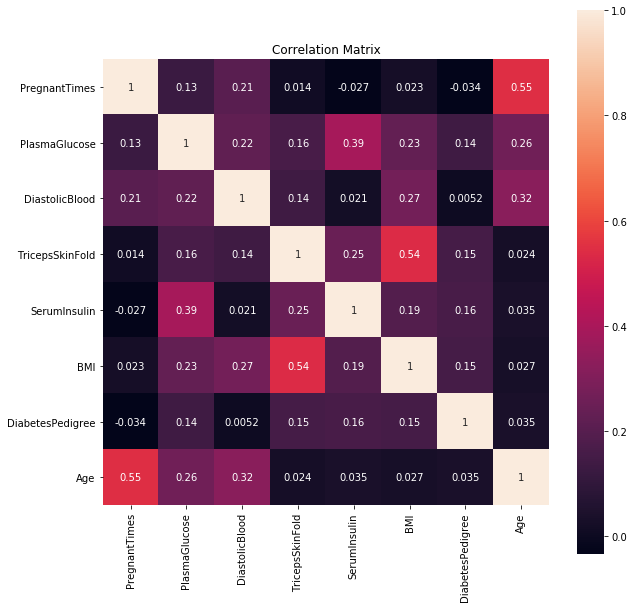

In [29]:
# Plotting Correlation Matrix to see if some features are dominating on other features and eradicating uselesss features

plt.subplots(figsize=(10, 10))
plt.title('Correlation Matrix')
sns.heatmap(Feature.astype(float).corr(), square=True, annot=True)

## There are no conclusive features which are directly correlated so we can continue with all the features for X


# Hepatitis Dataset 

In [30]:
# Reading Hepatitis Dataset

hepatitis_df = pd.read_csv("Datasets/hepatitis-data.txt",delimiter=',')

In [31]:
# Visualizing first 5 rows

hepatitis_df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


## Attribute information from hepatitus-description.txt:
     1. Class: DIE, LIVE
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     3. SEX: male, female
     4. STEROID: no, yes
     5. ANTIVIRALS: no, yes
     6. FATIGUE: no, yes
     7. MALAISE: no, yes
     8. ANOREXIA: no, yes
     9. LIVER BIG: no, yes
    10. LIVER FIRM: no, yes
    11. SPLEEN PALPABLE: no, yes
    12. SPIDERS: no, yes
    13. ASCITES: no, yes
    14. VARICES: no, yes
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
        -- see the note below
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
    17. SGOT: 13, 100, 200, 300, 400, 500, 
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
    20. HISTOLOGY: no, yes

In [32]:
# Giving Column Names Present in Dataset

hepatitis_df.columns = [
                        'Class',
                        'AGE',
                        'SEX',
                        'STEROID',
                        'ANTIVIRALS',
                        'FATIGUE',
                        'MALAISE',
                        'ANOREXIA',
                        'LIVER BIG',
                        'LIVER FIRM',
                        'SPLEEN PALPABLE',
                        'SPIDERS','ASCITES',
                        'VARICES','BILIRUBIN',
                        'ALK PHOSPHATE','SGOT',
                        'ALBUMIN','PROTIME',
                        'HISTOLOGY'
                    ]

In [33]:
# Visualising dataset with column names
hepatitis_df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [34]:
# Last 5 rows of dataset

hepatitis_df.tail()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
149,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
150,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
151,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
153,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


In [35]:
# Checking the shape of dataset

hepatitis_df.shape

(154, 20)

In [36]:
# Replcaing the '?' with nan values

hepatitis_df.replace("?", np.nan, inplace = True)

In [37]:
# Checking the output label count

hepatitis_df['Class'].value_counts()

2    122
1     32
Name: Class, dtype: int64

In [38]:
# Mean of null rows of dataset

hepatitis_df.isnull().mean()

Class              0.000000
AGE                0.000000
SEX                0.000000
STEROID            0.006494
ANTIVIRALS         0.000000
FATIGUE            0.006494
MALAISE            0.006494
ANOREXIA           0.006494
LIVER BIG          0.064935
LIVER FIRM         0.071429
SPLEEN PALPABLE    0.032468
SPIDERS            0.032468
ASCITES            0.032468
VARICES            0.032468
BILIRUBIN          0.038961
ALK PHOSPHATE      0.188312
SGOT               0.025974
ALBUMIN            0.103896
PROTIME            0.428571
HISTOLOGY          0.000000
dtype: float64

In [39]:
# Summary Statistics of dataset

hepatitis_df.describe()

,Class,AGE,SEX,ANTIVIRALS,HISTOLOGY
count,154.000000,154.000000,154.000000,154.000000,154.000000
mean,1.792208,41.272727,1.097403,1.844156,1.454545
std,0.407051,12.574106,0.297473,0.363891,0.499554
min,1.000000,7.000000,1.000000,1.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000


In [40]:
# Checking the data types of dataframe column because less column shows in summary statistics

hepatitis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Class            154 non-null    int64 
 1   AGE              154 non-null    int64 
 2   SEX              154 non-null    int64 
 3   STEROID          153 non-null    object
 4   ANTIVIRALS       154 non-null    int64 
 5   FATIGUE          153 non-null    object
 6   MALAISE          153 non-null    object
 7   ANOREXIA         153 non-null    object
 8   LIVER BIG        144 non-null    object
 9   LIVER FIRM       143 non-null    object
 10  SPLEEN PALPABLE  149 non-null    object
 11  SPIDERS          149 non-null    object
 12  ASCITES          149 non-null    object
 13  VARICES          149 non-null    object
 14  BILIRUBIN        148 non-null    object
 15  ALK PHOSPHATE    125 non-null    object
 16  SGOT             150 non-null    object
 17  ALBUMIN          138 non-null    ob

## Attribute information from hepatitus-description.txt:
     1. Class: DIE, LIVE
     2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
     3. SEX: male, female
     4. STEROID: no, yes
     5. ANTIVIRALS: no, yes
     6. FATIGUE: no, yes
     7. MALAISE: no, yes
     8. ANOREXIA: no, yes
     9. LIVER BIG: no, yes
    10. LIVER FIRM: no, yes
    11. SPLEEN PALPABLE: no, yes
    12. SPIDERS: no, yes
    13. ASCITES: no, yes
    14. VARICES: no, yes
    15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
        -- see the note below
    16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
    17. SGOT: 13, 100, 200, 300, 400, 500, 
    18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
    19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
    20. HISTOLOGY: no, yes

In [41]:
# Getting the Column Names

hepatitis_df.columns

Index(['Class', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE',
       'ANOREXIA', 'LIVER BIG', 'LIVER FIRM', 'SPLEEN PALPABLE', 'SPIDERS',
       'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK PHOSPHATE', 'SGOT', 'ALBUMIN',
       'PROTIME', 'HISTOLOGY'],
      dtype='object')

In [42]:
# Getting all the column which are numeric and provided info in description txt file so we can change into float values

numColumns = ['AGE','BILIRUBIN','ALK PHOSPHATE','SGOT','ALBUMIN','PROTIME']

In [43]:
# Converting string columns into float values

hepatitis_df["BILIRUBIN"] = hepatitis_df["BILIRUBIN"].astype(float)
hepatitis_df["BILIRUBIN"].head()

0    0.9
1    0.7
2    0.7
3    1.0
4    0.9
Name: BILIRUBIN, dtype: float64

In [44]:
# Converting string columns into float values

hepatitis_df["ALK PHOSPHATE"] = hepatitis_df["ALK PHOSPHATE"].astype(float)
hepatitis_df["ALK PHOSPHATE"].head()

0    135.0
1     96.0
2     46.0
3      NaN
4     95.0
Name: ALK PHOSPHATE, dtype: float64

In [45]:
# Converting string columns into float values

hepatitis_df["SGOT"] = hepatitis_df["SGOT"].astype(float)
hepatitis_df["SGOT"].head()

0     42.0
1     32.0
2     52.0
3    200.0
4     28.0
Name: SGOT, dtype: float64

In [46]:
# Converting string columns into float values

hepatitis_df["ALBUMIN"] = hepatitis_df["ALBUMIN"].astype(float)
hepatitis_df["ALBUMIN"].head()

0    3.5
1    4.0
2    4.0
3    4.0
4    4.0
Name: ALBUMIN, dtype: float64

In [47]:
# Converting string columns into float values

hepatitis_df["PROTIME"] = hepatitis_df["PROTIME"].astype(float)
hepatitis_df["PROTIME"].head()

0     NaN
1     NaN
2    80.0
3     NaN
4    75.0
Name: PROTIME, dtype: float64

In [48]:
# Checking the summary Statistics again to see if we are getting all the column now

hepatitis_df.describe()

,Class,AGE,SEX,ANTIVIRALS,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
count,154.000000,154.000000,154.000000,154.000000,148.000000,125.000000,150.000000,138.000000,88.000000,154.000000
mean,1.792208,41.272727,1.097403,1.844156,1.430405,105.488000,86.346667,3.815942,61.852273,1.454545
std,0.407051,12.574106,0.297473,0.363891,1.215750,51.682907,89.777950,0.653709,22.875244,0.499554
min,1.000000,7.000000,1.000000,1.000000,0.300000,26.000000,14.000000,2.100000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,2.000000,0.700000,74.000000,32.250000,3.400000,46.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,1.000000,85.000000,58.000000,4.000000,61.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,1.500000,133.000000,100.750000,4.200000,76.250000,2.000000
max,2.000000,78.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [49]:
# Getting the sum of all null values of particular column

hepatitis_df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           6
ALK PHOSPHATE      29
SGOT                4
ALBUMIN            16
PROTIME            66
HISTOLOGY           0
dtype: int64

In [50]:
# Fill Missing values with mean of the columns which have alot of nan values

hepatitis_df['BILIRUBIN'] = hepatitis_df['BILIRUBIN'].fillna(hepatitis_df['BILIRUBIN'].mean())
hepatitis_df['BILIRUBIN']

0      0.9
1      0.7
2      0.7
3      1.0
4      0.9
      ... 
149    7.6
150    0.9
151    0.8
152    1.5
153    1.2
Name: BILIRUBIN, Length: 154, dtype: float64

In [51]:
# Fill Missing values with mean of the columns which have alot of nan values

hepatitis_df['ALK PHOSPHATE'] = hepatitis_df['ALK PHOSPHATE'].fillna(hepatitis_df['ALK PHOSPHATE'].mean())
hepatitis_df['ALK PHOSPHATE']

0      135.000
1       96.000
2       46.000
3      105.488
4       95.000
        ...   
149    105.488
150    126.000
151     75.000
152     81.000
153    100.000
Name: ALK PHOSPHATE, Length: 154, dtype: float64

In [52]:
# Fill Missing values with mean of the columns which have alot of nan values

hepatitis_df['SGOT'] = hepatitis_df['SGOT'].fillna(hepatitis_df['SGOT'].mean())
hepatitis_df['SGOT']

0       42.0
1       32.0
2       52.0
3      200.0
4       28.0
       ...  
149    242.0
150    142.0
151     20.0
152     19.0
153     19.0
Name: SGOT, Length: 154, dtype: float64

In [53]:
# Fill Missing values with mean of the columns which have alot of nan values

hepatitis_df['ALBUMIN'] = hepatitis_df['ALBUMIN'].fillna(hepatitis_df['ALBUMIN'].mean())
hepatitis_df['ALBUMIN']

0      3.5
1      4.0
2      4.0
3      4.0
4      4.0
      ... 
149    3.3
150    4.3
151    4.1
152    4.1
153    3.1
Name: ALBUMIN, Length: 154, dtype: float64

In [54]:
# Fill Missing values with mean of the columns which have alot of nan values

hepatitis_df['PROTIME'] = hepatitis_df['PROTIME'].fillna(hepatitis_df['PROTIME'].mean())
hepatitis_df['PROTIME']

0      61.852273
1      61.852273
2      80.000000
3      61.852273
4      75.000000
         ...    
149    50.000000
150    61.852273
151    61.852273
152    48.000000
153    42.000000
Name: PROTIME, Length: 154, dtype: float64

In [55]:
# Checking again now how many columns are still have nan values. There are stirng columns

hepatitis_df.isnull().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             1
MALAISE             1
ANOREXIA            1
LIVER BIG          10
LIVER FIRM         11
SPLEEN PALPABLE     5
SPIDERS             5
ASCITES             5
VARICES             5
BILIRUBIN           0
ALK PHOSPHATE       0
SGOT                0
ALBUMIN             0
PROTIME             0
HISTOLOGY           0
dtype: int64

In [56]:
# Replacing all the categorical column values with mode imputation

hepatitis_df = hepatitis_df.fillna(hepatitis_df.mode().iloc[0])

In [57]:
# Checking for null values again. Now dataset is preety clean

hepatitis_df.isnull().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

In [58]:
# Data types of each column

hepatitis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            154 non-null    int64  
 1   AGE              154 non-null    int64  
 2   SEX              154 non-null    int64  
 3   STEROID          154 non-null    object 
 4   ANTIVIRALS       154 non-null    int64  
 5   FATIGUE          154 non-null    object 
 6   MALAISE          154 non-null    object 
 7   ANOREXIA         154 non-null    object 
 8   LIVER BIG        154 non-null    object 
 9   LIVER FIRM       154 non-null    object 
 10  SPLEEN PALPABLE  154 non-null    object 
 11  SPIDERS          154 non-null    object 
 12  ASCITES          154 non-null    object 
 13  VARICES          154 non-null    object 
 14  BILIRUBIN        154 non-null    float64
 15  ALK PHOSPHATE    154 non-null    float64
 16  SGOT             154 non-null    float64
 17  ALBUMIN         

In [59]:
# Converting whole dataset into float

hepatitis_df = hepatitis_df.astype(float)

In [60]:
# Varify if dataset is fully converted

hepatitis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            154 non-null    float64
 1   AGE              154 non-null    float64
 2   SEX              154 non-null    float64
 3   STEROID          154 non-null    float64
 4   ANTIVIRALS       154 non-null    float64
 5   FATIGUE          154 non-null    float64
 6   MALAISE          154 non-null    float64
 7   ANOREXIA         154 non-null    float64
 8   LIVER BIG        154 non-null    float64
 9   LIVER FIRM       154 non-null    float64
 10  SPLEEN PALPABLE  154 non-null    float64
 11  SPIDERS          154 non-null    float64
 12  ASCITES          154 non-null    float64
 13  VARICES          154 non-null    float64
 14  BILIRUBIN        154 non-null    float64
 15  ALK PHOSPHATE    154 non-null    float64
 16  SGOT             154 non-null    float64
 17  ALBUMIN         

In [61]:
# Selecting all the features initially for our X

Feature = hepatitis_df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]

In [62]:
X = Feature
X.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,50.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000,42.0,3.5,61.852273,1.0
1,78.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000,32.0,4.0,61.852273,1.0
2,31.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000,52.0,4.0,80.000000,1.0
3,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.488,200.0,4.0,61.852273,1.0
4,34.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.9,95.000,28.0,4.0,75.000000,1.0


In [63]:
# Data Normalization for getting better and faster results

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.69633156, -0.32850216, -1.02632029,  0.42966892, -0.72439801,
         0.80988516,  0.51214752, -2.32737334,  0.79893546,  0.49186938,
         0.70366585,  0.3863337 ,  0.36380344, -0.44654502,  0.63635759,
        -0.50217897, -0.51241652,  0.        , -0.91287093],
       [ 2.93039531, -0.32850216,  0.9743547 ,  0.42966892, -0.72439801,
         0.80988516,  0.51214752,  0.42966892,  0.79893546,  0.49186938,
         0.70366585,  0.3863337 ,  0.36380344, -0.61492377, -0.20458664,
        -0.61541837,  0.29851788,  0.        , -0.91287093],
       [-0.81964027, -0.32850216,  0.9743547 , -2.32737334,  1.38045658,
         0.80988516,  0.51214752,  0.42966892,  0.79893546,  0.49186938,
         0.70366585,  0.3863337 ,  0.36380344, -0.61492377, -1.28272026,
        -0.38893958,  0.29851788,  1.05549759, -0.91287093],
       [-0.5802763 , -0.32850216,  0.9743547 ,  0.42966892,  1.38045658,
         0.80988516,  0.51214752,  0.42966892,  0.79893546,  0.49186938,
         0.703

In [64]:
# Selecting the output value (y)

output = hepatitis_df.iloc[:, [0]]

In [65]:
y = output
y.head()

,Class
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0


In [66]:
# Converting the label into int value

y = y.astype(int)

In [67]:
y = y['Class'].values
y[0:5]

array([2, 2, 2, 2, 2])

# Applying KNN to Hepatitis Dataset

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(115, 19)
(39, 19)
(115,)
(39,)


In [69]:
# Applying KNN on differnt values of K

k = 1
for i in range (20):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
    yhat = knn.predict(X_test)
    print ("KNN with k = " + str(k))
    print("Accuracy on train data with k = " + str (k) + " : ", metrics.accuracy_score(Y_train,knn.predict(X_train)) * 100)
    print("Accuracy on test data with  k = " + str(k) + " : ", metrics.accuracy_score(Y_test, yhat) * 100)
    print ()
    k+=1
    

KNN with k = 1
Accuracy on train data with k = 1 :  100.0
Accuracy on test data with  k = 1 :  82.05128205128204

KNN with k = 2
Accuracy on train data with k = 2 :  93.04347826086956
Accuracy on test data with  k = 2 :  79.48717948717949

KNN with k = 3
Accuracy on train data with k = 3 :  93.04347826086956
Accuracy on test data with  k = 3 :  87.17948717948718

KNN with k = 4
Accuracy on train data with k = 4 :  92.17391304347827
Accuracy on test data with  k = 4 :  87.17948717948718

KNN with k = 5
Accuracy on train data with k = 5 :  90.43478260869566
Accuracy on test data with  k = 5 :  84.61538461538461

KNN with k = 6
Accuracy on train data with k = 6 :  89.56521739130436
Accuracy on test data with  k = 6 :  87.17948717948718

KNN with k = 7
Accuracy on train data with k = 7 :  87.82608695652175
Accuracy on test data with  k = 7 :  84.61538461538461

KNN with k = 8
Accuracy on train data with k = 8 :  86.08695652173914
Accuracy on test data with  k = 8 :  87.17948717948718

KNN 

## The best accuracy is on K = 3 with Train Accuracy = 93.04% & Test Accuracy = 87.17%

# Applying Naive Bayes on Hepatitus Dataset

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0) 

In [71]:
# Bernaouli Naive Bayes

from sklearn.naive_bayes import BernoulliNB 
gnb = BernoulliNB() 
gnb.fit(X_train, y_train) 

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [72]:
y_pred = gnb.predict(X_test) 
y_trainPred = gnb.predict(X_train) 
  

from sklearn import metrics
print("Bernoulli Naive Bayes model accuracy on test set     :", metrics.accuracy_score(y_test, y_pred)*100)

Bernoulli Naive Bayes model accuracy on test set     : 82.97872340425532


In [73]:
# Gaussian Naive Bayes


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0) 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
y_trainPred = gnb.predict(X_train) 


print("Gaussian Naive Bayes model accuracy on test set     :", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy on test set     : 63.829787234042556


## The best accuracy is found on Bernoulli Naive Bayes with Test Acc = 83%

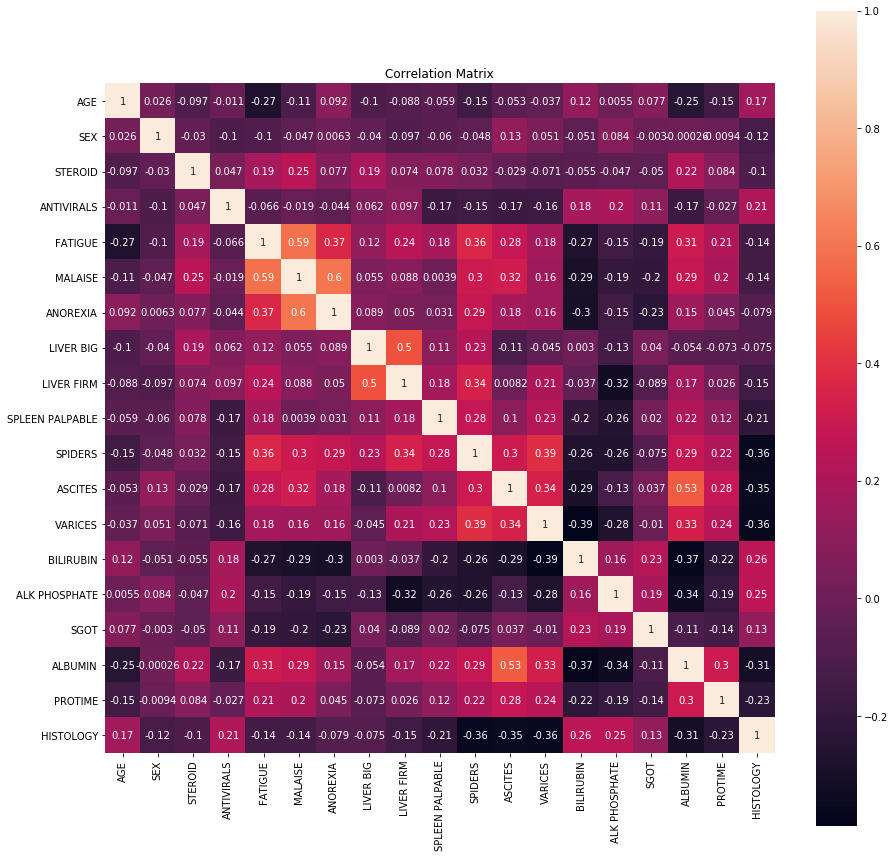

In [74]:
# Plotting Correlation Matrix to see if some features are dominating on other features and eradicating uselesss features

plt.subplots(figsize=(15, 15))
plt.title('Correlation Matrix')
sns.heatmap(Feature.astype(float).corr(), square=True, annot=True)

In [75]:
# Removing Problematic Features with negative correlation values i.e col# 2, 13, 14, 16, 19

Feature = hepatitis_df.iloc[:, [1,3,4,5,6,7,8,9,10,11,12,15,17,18]]

In [76]:
# Selecting our new features 

X = Feature

In [77]:
# Applying normalization

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.69633156, -1.02632029,  0.42966892, -0.72439801,  0.80988516,
         0.51214752, -2.32737334,  0.79893546,  0.49186938,  0.70366585,
         0.3863337 ,  0.63635759, -0.51241652,  0.        ],
       [ 2.93039531,  0.9743547 ,  0.42966892, -0.72439801,  0.80988516,
         0.51214752,  0.42966892,  0.79893546,  0.49186938,  0.70366585,
         0.3863337 , -0.20458664,  0.29851788,  0.        ],
       [-0.81964027,  0.9743547 , -2.32737334,  1.38045658,  0.80988516,
         0.51214752,  0.42966892,  0.79893546,  0.49186938,  0.70366585,
         0.3863337 , -1.28272026,  0.29851788,  1.05549759],
       [-0.5802763 ,  0.9743547 ,  0.42966892,  1.38045658,  0.80988516,
         0.51214752,  0.42966892,  0.79893546,  0.49186938,  0.70366585,
         0.3863337 ,  0.        ,  0.29851788,  0.        ],
       [-0.5802763 ,  0.9743547 ,  0.42966892,  1.38045658,  0.80988516,
         0.51214752,  0.42966892,  0.79893546,  0.49186938,  0.70366585,
         0.3863337 , -0.22

In [78]:
# Splitting data again

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(115, 14)
(39, 14)
(115,)
(39,)


In [79]:
# Applying KNN on differnt values of K

k = 1
for i in range (20):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
    yhat = knn.predict(X_test)
    print ("KNN with k = " + str(k))
    print("Accuracy on train data with k = " + str (k) + " : ", metrics.accuracy_score(Y_train,knn.predict(X_train)) * 100)
    print("Accuracy on test data with  k = " + str(k) + " : ", metrics.accuracy_score(Y_test, yhat) * 100)
    print ()
    k+=1
    

KNN with k = 1
Accuracy on train data with k = 1 :  100.0
Accuracy on test data with  k = 1 :  82.05128205128204

KNN with k = 2
Accuracy on train data with k = 2 :  89.56521739130436
Accuracy on test data with  k = 2 :  76.92307692307693

KNN with k = 3
Accuracy on train data with k = 3 :  88.69565217391305
Accuracy on test data with  k = 3 :  84.61538461538461

KNN with k = 4
Accuracy on train data with k = 4 :  84.34782608695653
Accuracy on test data with  k = 4 :  87.17948717948718

KNN with k = 5
Accuracy on train data with k = 5 :  85.21739130434783
Accuracy on test data with  k = 5 :  92.3076923076923

KNN with k = 6
Accuracy on train data with k = 6 :  85.21739130434783
Accuracy on test data with  k = 6 :  87.17948717948718

KNN with k = 7
Accuracy on train data with k = 7 :  86.08695652173914
Accuracy on test data with  k = 7 :  89.74358974358975

KNN with k = 8
Accuracy on train data with k = 8 :  85.21739130434783
Accuracy on test data with  k = 8 :  92.3076923076923

KNN wi

# Now we are getting maximum accuracy of 92% but model is overfitting slightly

In [80]:
# Confusion Matrix After Feature Improvement

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = classification_report(Y_test,yhat)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.29      0.44         7
           2       0.86      1.00      0.93        32

    accuracy                           0.87        39
   macro avg       0.93      0.64      0.69        39
weighted avg       0.89      0.87      0.84        39



# Liver-Disorder Dataset 


In [81]:
# Reading dataset

liver_df = pd.read_csv("Datasets/liver_disorder_data.txt",delimiter=',')

In [82]:
liver_df.head()

,85,92,45,27,31,0.0,1
0,85,64,59,32,23,0.0,2
1,86,54,33,16,54,0.0,2
2,91,78,34,24,36,0.0,2
3,87,70,?,28,10,0.0,2
4,98,55,13,17,17,0.0,2


#  Attribute information:
   1. mcv	mean corpuscular volume
   2. alkphos	alkaline phosphotase
   3. sgpt	alamine aminotransferase
   4. sgot 	aspartate aminotransferase
   5. gammagt	gamma-glutamyl transpeptidase
   6. drinks	number of half-pint equivalents of alcoholic beverages drunk per day
   7. selector  field used to split data into two sets


In [83]:
# Giving the column names as given in text file

liver_df.columns = [
                        'mcv',
                        'alkphos',
                        'sgpt',
                        'sgot',
                        'gammagt',
                        'drinks',
                        'selector'
                    ]

In [84]:
liver_df.head(5)

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
0,85,64,59,32,23,0.0,2
1,86,54,33,16,54,0.0,2
2,91,78,34,24,36,0.0,2
3,87,70,?,28,10,0.0,2
4,98,55,13,17,17,0.0,2


In [85]:
liver_df.tail(5)

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
339,99,75,26,24,41,12.0,1
340,96,69,53,43,203,12.0,2
341,98,77,55,35,89,15.0,1
342,91,68,27,26,14,16.0,1
343,98,99,57,45,65,20.0,1


In [86]:
liver_df.shape

(344, 7)

In [87]:
# Replacing ? with nan

liver_df.replace("?", np.nan, inplace = True)

In [88]:
liver_df.isnull().mean()

mcv         0.008721
alkphos     0.008721
sgpt        0.017442
sgot        0.011628
gammagt     0.005814
drinks      0.005814
selector    0.000000
dtype: float64

In [89]:
liver_df.isnull().sum()

mcv         3
alkphos     3
sgpt        6
sgot        4
gammagt     2
drinks      2
selector    0
dtype: int64

In [90]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   mcv       341 non-null    object
 1   alkphos   341 non-null    object
 2   sgpt      338 non-null    object
 3   sgot      340 non-null    object
 4   gammagt   342 non-null    object
 5   drinks    342 non-null    object
 6   selector  344 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 18.9+ KB


In [91]:
liver_df = liver_df.astype(float)

In [92]:
liver_df = liver_df.fillna(liver_df.mean())

In [93]:
liver_df.describe()

,mcv,alkphos,sgpt,sgot,gammagt,drinks,selector
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,90.219941,69.917889,30.420118,24.482353,38.421053,3.450292,1.581395
std,4.418522,18.291589,19.436099,9.910811,39.268953,3.331822,0.494049
min,65.000000,23.000000,4.000000,5.000000,5.000000,0.000000,1.000000
25%,87.750000,57.000000,20.000000,19.000000,15.000000,0.500000,1.000000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000,2.000000
75%,93.000000,80.000000,34.000000,27.000000,46.250000,5.250000,2.000000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000,2.000000


In [94]:
liver_df.isin({0.0}).sum()

mcv         0
alkphos     0
sgpt        0
sgot        0
gammagt     0
drinks      8
selector    0
dtype: int64

In [95]:
liver_df['selector'] = liver_df['selector'].astype(int)

In [96]:
Feature = liver_df.iloc[:, [0,1,2,3,4,5]]

In [97]:
X = liver_df.iloc[:, [0,1,2,3,4,5]]
X.head()

,mcv,alkphos,sgpt,sgot,gammagt,drinks
0,85.0,64.0,59.000000,32.0,23.0,0.0
1,86.0,54.0,33.000000,16.0,54.0,0.0
2,91.0,78.0,34.000000,24.0,36.0,0.0
3,87.0,70.0,30.420118,28.0,10.0,0.0
4,98.0,55.0,13.000000,17.0,17.0,0.0


In [98]:
y = liver_df['selector'].values
y[0:5]

array([2, 2, 2, 2, 2])

In [99]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.18309812e+00, -3.24001869e-01,  1.47259557e+00,
         7.59634858e-01, -3.93275474e-01, -1.03706584e+00],
       [-9.56448426e-01, -8.71497595e-01,  1.32929953e-01,
        -8.57115387e-01,  3.97302185e-01, -1.03706584e+00],
       [ 1.76800057e-01,  4.42492147e-01,  1.84455553e-01,
        -4.87402648e-02, -6.17429072e-02, -1.03706584e+00],
       [-7.29798730e-01,  4.49556608e-03, -1.83055707e-16,
         3.55447297e-01, -7.24808041e-01, -1.03706584e+00],
       [ 1.76334793e+00, -8.16748023e-01, -8.97582065e-01,
        -7.56068497e-01, -5.46290505e-01, -1.03706584e+00]])

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(240, 6)
(104, 6)
(240,)
(104,)


In [101]:
k = 1
for i in range (20):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
    yhat = knn.predict(X_test)
    print ("KNN With k = " + str(k))
    print("Accuracy on train data with k = " + str (k) + " : ", metrics.accuracy_score(Y_train,knn.predict(X_train)) * 100)
    print("Accuracy on test data with  k = " + str(k) + " : ", metrics.accuracy_score(Y_test, yhat) * 100)
    print ()
    k+=1
    

KNN With k = 1
Accuracy on train data with k = 1 :  100.0
Accuracy on test data with  k = 1 :  51.92307692307693

KNN With k = 2
Accuracy on train data with k = 2 :  80.83333333333333
Accuracy on test data with  k = 2 :  52.88461538461539

KNN With k = 3
Accuracy on train data with k = 3 :  82.91666666666667
Accuracy on test data with  k = 3 :  63.46153846153846

KNN With k = 4
Accuracy on train data with k = 4 :  77.5
Accuracy on test data with  k = 4 :  53.84615384615385

KNN With k = 5
Accuracy on train data with k = 5 :  75.41666666666667
Accuracy on test data with  k = 5 :  55.769230769230774

KNN With k = 6
Accuracy on train data with k = 6 :  71.66666666666667
Accuracy on test data with  k = 6 :  54.807692307692314

KNN With k = 7
Accuracy on train data with k = 7 :  72.5
Accuracy on test data with  k = 7 :  58.65384615384615

KNN With k = 8
Accuracy on train data with k = 8 :  71.66666666666667
Accuracy on test data with  k = 8 :  58.65384615384615

KNN With k = 9
Accuracy on t

In [102]:
# Confusion Matrix Before Feature Improvement

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = classification_report(Y_test,yhat)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.65      0.67      0.66        46
           2       0.73      0.71      0.72        58

    accuracy                           0.69       104
   macro avg       0.69      0.69      0.69       104
weighted avg       0.69      0.69      0.69       104



# The best accuracy is on K = 19 with Accuracy = 70.19%

# Naive Bayes Classifier

In [103]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0) 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test)   

from sklearn import metrics
print("Gaussian Naive Bayes model accuracy on test set     :", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy on test set     : 57.692307692307686


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0) 
from sklearn.naive_bayes import BernoulliNB 
gnb = BernoulliNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test)   

from sklearn import metrics
print("Bernoulli Naive Bayes model accuracy on test set     :", metrics.accuracy_score(y_test, y_pred)*100)

Bernoulli Naive Bayes model accuracy on test set     : 60.57692307692307


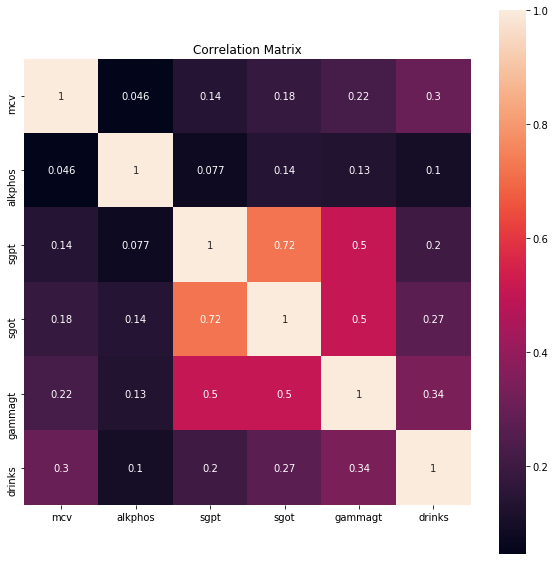

In [105]:
plt.subplots(figsize=(10, 10))
plt.title('Correlation Matrix')
sns.heatmap(Feature.astype(float).corr(), square=True, annot=True)

### Selected those features which are highly correlated

In [106]:
# Selecting sgpt, sgot, gammagt and drinks due to highly correlated results

X = liver_df.iloc[:, [2,3,4,5]]
X.head()

,sgpt,sgot,gammagt,drinks
0,59.000000,32.0,23.0,0.0
1,33.000000,16.0,54.0,0.0
2,34.000000,24.0,36.0,0.0
3,30.420118,28.0,10.0,0.0
4,13.000000,17.0,17.0,0.0


In [107]:
# Applying normalization

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.47259557e+00,  7.59634858e-01, -3.93275474e-01,
        -1.03706584e+00],
       [ 1.32929953e-01, -8.57115387e-01,  3.97302185e-01,
        -1.03706584e+00],
       [ 1.84455553e-01, -4.87402648e-02, -6.17429072e-02,
        -1.03706584e+00],
       [-1.83055707e-16,  3.55447297e-01, -7.24808041e-01,
        -1.03706584e+00],
       [-8.97582065e-01, -7.56068497e-01, -5.46290505e-01,
        -1.03706584e+00]])

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.30, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(240, 4)
(104, 4)
(240,)
(104,)


In [109]:
predd = []
k = 1
for i in range (20):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
    yhat = knn.predict(X_test)
    print ("KNN With k = " + str(k))
    print("Accuracy on train data with k = " + str (k) + " : ", metrics.accuracy_score(Y_train,knn.predict(X_train)) * 100)
    print("Accuracy on test data with  k = " + str(k) + " : ", metrics.accuracy_score(Y_test, yhat) * 100)
    print ()
    k+=1
    

KNN With k = 1
Accuracy on train data with k = 1 :  100.0
Accuracy on test data with  k = 1 :  59.61538461538461

KNN With k = 2
Accuracy on train data with k = 2 :  81.66666666666667
Accuracy on test data with  k = 2 :  55.769230769230774

KNN With k = 3
Accuracy on train data with k = 3 :  84.16666666666667
Accuracy on test data with  k = 3 :  65.38461538461539

KNN With k = 4
Accuracy on train data with k = 4 :  80.83333333333333
Accuracy on test data with  k = 4 :  64.42307692307693

KNN With k = 5
Accuracy on train data with k = 5 :  76.66666666666667
Accuracy on test data with  k = 5 :  65.38461538461539

KNN With k = 6
Accuracy on train data with k = 6 :  77.91666666666667
Accuracy on test data with  k = 6 :  64.42307692307693

KNN With k = 7
Accuracy on train data with k = 7 :  74.58333333333333
Accuracy on test data with  k = 7 :  66.34615384615384

KNN With k = 8
Accuracy on train data with k = 8 :  76.66666666666667
Accuracy on test data with  k = 8 :  66.34615384615384

KNN

In [110]:
# Confusion Matrix After Feature Improvement

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = classification_report(Y_test,yhat)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           1       0.75      0.59      0.66        46
           2       0.72      0.84      0.78        58

    accuracy                           0.73       104
   macro avg       0.74      0.72      0.72       104
weighted avg       0.73      0.73      0.73       104



In [111]:
# Getting confusion Matrix

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:  
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==2:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return(TP, FP, TN, FN)

tp, fp, tn, fn = perf_measure(Y_test, yhat)

print ("True Positive  : " + str(tp))
print ("False Positive : " + str(fp))
print ("True Nagative  : "  + str(tn))
print ("False Negative : " + str(fn))

True Positive  : 27
False Positive : 9
True Nagative  : 49
False Negative : 0


In [112]:
# Cross Validaiton With Bin Size of 5 and tested on different sizes

from sklearn.model_selection import cross_val_score

k = 1

for i in range (20):
    print ("K = " + str(k))
    knn_cv = KNeighborsClassifier(n_neighbors = k)

    cv_scores = cross_val_score(knn_cv, X, y, cv = 5)
    print(cv_scores)
    print('Cross Validation Scores Mean:{}'.format(np.mean(cv_scores)))
    k = k + 1
    print ()

K = 1
[0.65217391 0.69565217 0.66666667 0.66666667 0.61764706]
Cross Validation Scores Mean:0.6597612958226768

K = 2
[0.5942029  0.66666667 0.65217391 0.66666667 0.63235294]
Cross Validation Scores Mean:0.6424126172208013

K = 3
[0.69565217 0.69565217 0.69565217 0.72463768 0.63235294]
Cross Validation Scores Mean:0.6887894288150043

K = 4
[0.62318841 0.69565217 0.65217391 0.65217391 0.63235294]
Cross Validation Scores Mean:0.6511082693947144

K = 5
[0.71014493 0.63768116 0.72463768 0.71014493 0.61764706]
Cross Validation Scores Mean:0.6800511508951407

K = 6
[0.68115942 0.69565217 0.69565217 0.68115942 0.69117647]
Cross Validation Scores Mean:0.6889599317988064

K = 7
[0.73913043 0.62318841 0.68115942 0.69565217 0.66176471]
Cross Validation Scores Mean:0.6801790281329922

K = 8
[0.68115942 0.57971014 0.63768116 0.66666667 0.70588235]
Cross Validation Scores Mean:0.6542199488491048

K = 9
[0.71014493 0.57971014 0.68115942 0.71014493 0.63235294]
Cross Validation Scores Mean:0.6627024722

# Lung-Cancer Data

In [113]:
lungCancer_df = pd.read_csv("Datasets/lung_cancer_data.txt", delimiter=',')

In [114]:
lungCancer_df.head(5)

,1,0,3,0.1,?,0.2,2,2.1,2.2,1.1,...,2.25,2.26,2.27,2.28,2.29,1.12,1.13,1.14,2.30,2.31
0,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
1,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
2,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
3,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2
4,1,0,3,3,2,0,3,3,3,1,...,?,2,2,2,2,2,2,2,1,2


In [115]:
lungCancer_df.shape

(31, 57)

## No information about columns are given so col1, col2 .. names are assigned

In [116]:
# Giving column Values

lungCancer_df.columns = [
                        'col1','col2','col3','col4','col5','col6','col7','col8','col9','col10',
                        'col11','col12','col13','col14','col15','col16','col17','col18','col19','col20',
                        'col21','col22','col23','col24','col52','col26','col27','col28','col29','col30',
                        'col31','col32','col33','col34','col35','col36','col37','col38','col39','col40',
                        'col41','col42','col43','col44','col45','col46','col47','col48','col49','col50',
                        'col51','col52','col53','col54','col55','col56','col57'
                    ]

In [117]:
lungCancer_df.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,...,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57
0,1,0,3,3,1,0,3,1,3,1,...,2,2,2,2,2,2,2,1,2,2
1,1,0,3,3,2,0,3,3,3,1,...,2,2,2,2,2,2,2,2,1,2
2,1,0,2,3,2,1,3,3,3,1,...,2,2,2,2,2,2,2,2,2,2
3,1,0,3,2,1,1,3,3,3,2,...,2,2,2,2,2,2,2,1,2,2
4,1,0,3,3,2,0,3,3,3,1,...,?,2,2,2,2,2,2,2,1,2


In [118]:
lungCancer_df.replace("?", np.nan, inplace = True)

In [119]:
lungCancer_df.isnull().sum()

col1     0
col2     1
col3     0
col4     0
col5     3
col6     1
col7     0
col8     0
col9     0
col10    0
col11    0
col12    1
col13    0
col14    0
col15    0
col16    0
col17    0
col18    0
col19    0
col20    0
col21    0
col22    0
col23    0
col24    0
col52    0
col26    0
col27    0
col28    0
col29    0
col30    1
col31    0
col32    0
col33    0
col34    0
col35    0
col36    0
col37    0
col38    0
col39    1
col40    0
col41    0
col42    1
col43    0
col44    0
col45    0
col46    0
col47    0
col48    1
col49    0
col50    0
col51    1
col52    0
col53    1
col54    0
col55    0
col56    0
col57    0
dtype: int64

In [120]:
lungCancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    31 non-null     int64 
 1   col2    30 non-null     object
 2   col3    31 non-null     int64 
 3   col4    31 non-null     int64 
 4   col5    28 non-null     object
 5   col6    30 non-null     object
 6   col7    31 non-null     int64 
 7   col8    31 non-null     int64 
 8   col9    31 non-null     int64 
 9   col10   31 non-null     int64 
 10  col11   31 non-null     int64 
 11  col12   30 non-null     object
 12  col13   31 non-null     int64 
 13  col14   31 non-null     int64 
 14  col15   31 non-null     int64 
 15  col16   31 non-null     int64 
 16  col17   31 non-null     int64 
 17  col18   31 non-null     int64 
 18  col19   31 non-null     int64 
 19  col20   31 non-null     int64 
 20  col21   31 non-null     int64 
 21  col22   31 non-null     int64 
 22  col23   31 non-null     int6

In [121]:
lungCancer_df = lungCancer_df.astype(float)

In [122]:
# Removing all null values

lungCancer_df['col5'] = lungCancer_df.fillna(lungCancer_df['col5'].mode())
lungCancer_df['col2'] = lungCancer_df.fillna(lungCancer_df['col2'].mode())
lungCancer_df['col6'] = lungCancer_df.fillna(lungCancer_df['col6'].mode())
lungCancer_df['col12'] = lungCancer_df.fillna(lungCancer_df['col12'].mode())
lungCancer_df['col29'] = lungCancer_df.fillna(lungCancer_df['col29'].mode())
lungCancer_df['col30'] = lungCancer_df.fillna(lungCancer_df['col30'].mode())
lungCancer_df['col39'] = lungCancer_df.fillna(lungCancer_df['col39'].mode())
lungCancer_df['col42'] = lungCancer_df.fillna(lungCancer_df['col42'].mode())
lungCancer_df['col48'] = lungCancer_df.fillna(lungCancer_df['col48'].mode())
lungCancer_df['col51'] = lungCancer_df.fillna(lungCancer_df['col51'].mode())
lungCancer_df['col53'] = lungCancer_df.fillna(lungCancer_df['col53'].mode())

In [123]:
lungCancer_df.isnull().sum()

col1     0
col2     0
col3     0
col4     0
col5     0
col6     0
col7     0
col8     0
col9     0
col10    0
col11    0
col12    0
col13    0
col14    0
col15    0
col16    0
col17    0
col18    0
col19    0
col20    0
col21    0
col22    0
col23    0
col24    0
col52    0
col26    0
col27    0
col28    0
col29    0
col30    0
col31    0
col32    0
col33    0
col34    0
col35    0
col36    0
col37    0
col38    0
col39    0
col40    0
col41    0
col42    0
col43    0
col44    0
col45    0
col46    0
col47    0
col48    0
col49    0
col50    0
col51    0
col52    0
col53    0
col54    0
col55    0
col56    0
col57    0
dtype: int64

In [124]:
# Selecting all features initially and then select only those which are good

Feature = lungCancer_df.loc[:, lungCancer_df.columns != 'col57']

In [125]:
X = Feature

In [126]:
y = lungCancer_df['col57'].values

In [127]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:2]

array([[-1.40203565, -1.40203565,  1.19098267,  0.93856213, -1.40203565,
        -1.40203565,  1.09422027, -1.50337873,  0.77174363, -0.3137279 ,
        -0.75560965, -1.40203565,  0.11306675, -1.16263672,  1.09422027,
         1.03279556, -0.60633906,  0.38490018,  0.38490018, -0.57777841,
        -1.1226828 ,  0.58976782,  0.48989795,  0.58976782, -0.54592083,
         0.50155039, -1.1684433 ,  1.44913767, -1.40203565, -1.40203565,
        -0.6350529 , -1.56961369, -1.56961369,  0.45927933,  1.91580419,
         0.5500191 ,  0.60633906,  0.42616235, -1.40203565,  0.06804138,
         0.        , -1.40203565, -1.19571306, -0.18257419,  0.26261287,
        -2.41746889,  0.14824986, -1.40203565, -0.26261287,  0.        ,
        -1.40203565,  0.        , -1.40203565,  0.306786  , -1.17669681,
         0.48989795],
       [-1.40203565, -1.40203565,  1.19098267,  0.93856213, -1.40203565,
        -1.40203565,  1.09422027,  1.1597493 ,  0.77174363, -0.3137279 ,
        -0.75560965, -1.40203

In [128]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.35, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(20, 56)
(11, 56)
(20,)
(11,)


In [129]:
# KNN with different k values

k = 1
for i in range (20):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
    yhat = knn.predict(X_test)
    print ("KNN With k = " + str(k))
    print("Accuracy on train data with k = " + str (k) + " : ", metrics.accuracy_score(Y_train,knn.predict(X_train)) * 100)
    print("Accuracy on test data with  k = " + str(k) + " : ", metrics.accuracy_score(Y_test, yhat) * 100)
    print ()
    k+=1

KNN With k = 1
Accuracy on train data with k = 1 :  100.0
Accuracy on test data with  k = 1 :  54.54545454545454

KNN With k = 2
Accuracy on train data with k = 2 :  95.0
Accuracy on test data with  k = 2 :  72.72727272727273

KNN With k = 3
Accuracy on train data with k = 3 :  95.0
Accuracy on test data with  k = 3 :  45.45454545454545

KNN With k = 4
Accuracy on train data with k = 4 :  95.0
Accuracy on test data with  k = 4 :  45.45454545454545

KNN With k = 5
Accuracy on train data with k = 5 :  85.0
Accuracy on test data with  k = 5 :  54.54545454545454

KNN With k = 6
Accuracy on train data with k = 6 :  85.0
Accuracy on test data with  k = 6 :  45.45454545454545

KNN With k = 7
Accuracy on train data with k = 7 :  80.0
Accuracy on test data with  k = 7 :  54.54545454545454

KNN With k = 8
Accuracy on train data with k = 8 :  85.0
Accuracy on test data with  k = 8 :  45.45454545454545

KNN With k = 9
Accuracy on train data with k = 9 :  80.0
Accuracy on test data with  k = 9 :  5

## KNN is giving high accuracy of 72%  which is very biased because we have only 31 rows

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0) 
from sklearn.naive_bayes import BernoulliNB 
gnb = BernoulliNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test)   

from sklearn import metrics
print("Bernoulli Naive Bayes model accuracy on test set     :", metrics.accuracy_score(y_test, y_pred)*100)

Bernoulli Naive Bayes model accuracy on test set     : 63.63636363636363


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0) 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test)   

from sklearn import metrics
print("Gaussian Naive Bayes model accuracy on test set     :", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy on test set     : 45.45454545454545


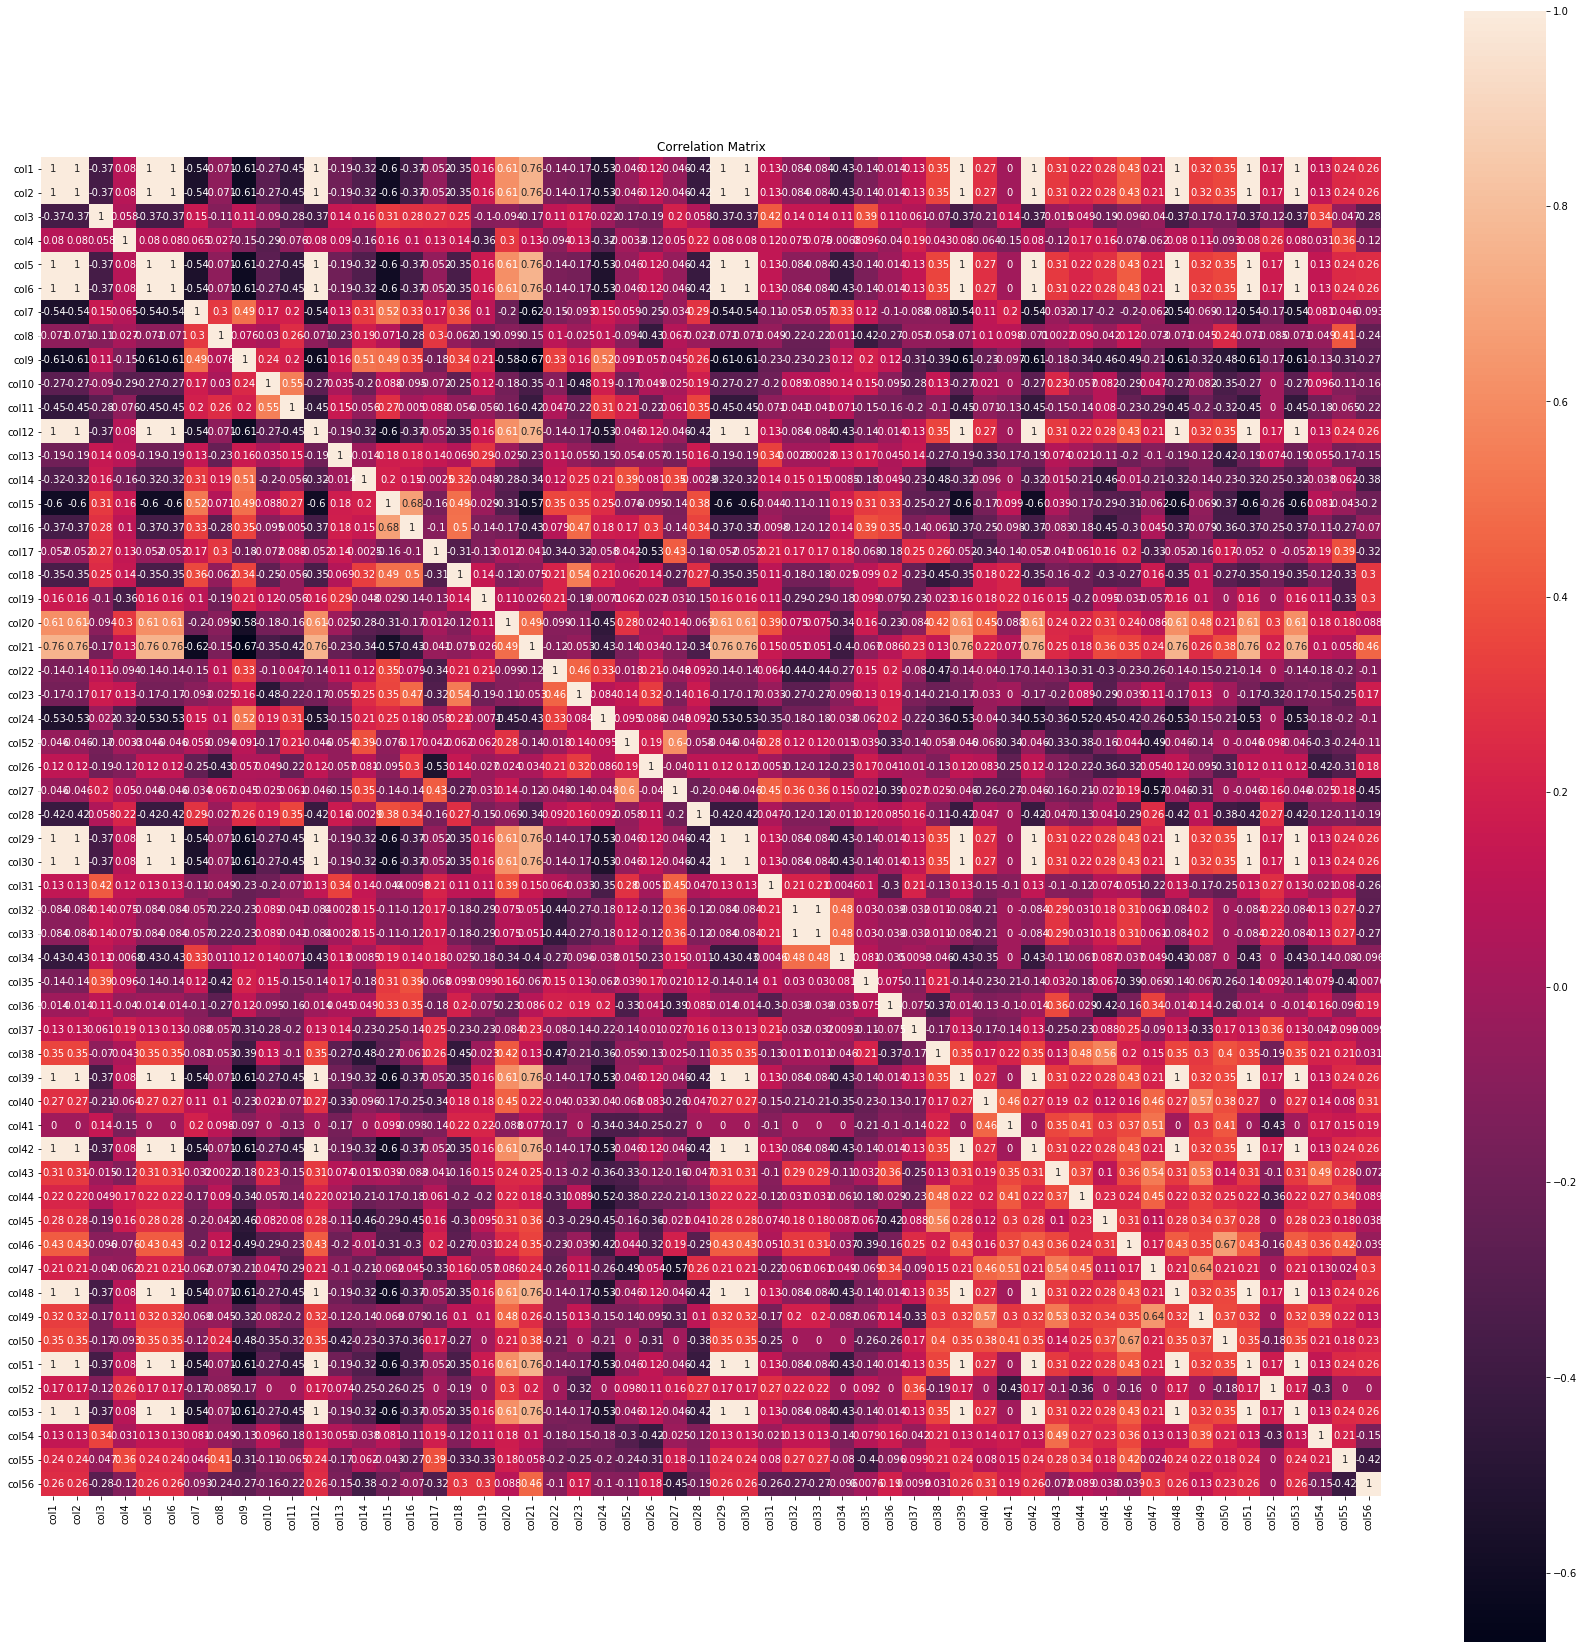

In [132]:
# Correlation Matrix

plt.subplots(figsize=(30, 30))
plt.title('Correlation Matrix')
sns.heatmap(Feature.astype(float).corr(), square=True, annot=True)

### There is no Conclusive Relation among different columns so we can go with all features selected